In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
world_df = pd.read_csv('ODI_Match_Data.csv', low_memory=False)
print(f"Dataset successfully Imported of Shape : {world_df.shape}")

Dataset successfully Imported of Shape : (1265103, 23)


In [3]:
world_df1 = pd.read_csv('ODI_Match_info.csv', low_memory=False)

In [4]:
# First 5 Columns Data
world_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [5]:
# Describing the t20i_dfset
world_df.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,cricsheet_id
count,1.265103e+06,1.265103e+06,1.265103e+06,1.265103e+06,1.265103e+06,28990.000000,5058.000000,1962.000000,12903.000000,18.0,0.0,0.0,1.265103e+06
mean,7.121242e+05,1.456583e+00,2.265861e+01,7.895112e-01,4.896281e-02,1.204208,1.036576,2.056575,1.369061,5.0,NaN,NaN,7.121242e+05
std,4.282254e+05,4.982083e-01,1.382100e+01,1.255689e+00,2.944322e-01,0.792682,0.320740,1.313392,0.884183,0.0,NaN,NaN,4.282254e+05
min,6.481400e+04,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,6.481400e+04
25%,3.353520e+05,1.000000e+00,1.060000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,3.353520e+05
50%,6.490990e+05,1.000000e+00,2.210000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,6.490990e+05
75%,1.144494e+06,2.000000e+00,3.420000e+01,1.000000e+00,0.000000e+00,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN,1.144494e+06
max,1.395701e+06,4.000000e+00,4.990000e+01,7.000000e+00,6.000000e+00,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN,1.395701e+06


In [6]:
# Information about Each Column
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265103 entries, 0 to 1265102
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   match_id                1265103 non-null  int64  
 1   season                  1265103 non-null  object 
 2   start_date              1265103 non-null  object 
 3   venue                   1265103 non-null  object 
 4   innings                 1265103 non-null  int64  
 5   ball                    1265103 non-null  float64
 6   batting_team            1265103 non-null  object 
 7   bowling_team            1265103 non-null  object 
 8   striker                 1265103 non-null  object 
 9   non_striker             1265103 non-null  object 
 10  bowler                  1265103 non-null  object 
 11  runs_off_bat            1265103 non-null  int64  
 12  extras                  1265103 non-null  int64  
 13  wides                   28990 non-null    float64
 14  no

In [7]:
# Adding the total runs and extras till now
world_df['innings_runs'] = world_df.groupby(['match_id', 'innings'])['runs_off_bat'].cumsum() + world_df.groupby(['match_id', 'innings'])['extras'].cumsum()

In [8]:
# Computing inning wickets
imp = world_df.iloc[:,[0,4,18]]
imp.loc[:,'wicket_type'] = imp['wicket_type'].fillna(0)

wicket_count_store=[]
cnt=0
imp['wicket_type'] = imp['wicket_type'].fillna(0)
f=1
for i in range(len(imp)):
    if imp['innings'][i]!=f:
        f=2
        cnt=0
    if imp['wicket_type'][i]!=0:
        cnt+=1
    wicket_count_store.append(cnt)
world_df['Innings_wickets'] = wicket_count_store

C:\Users\ravin\AppData\Local\Temp\ipykernel_15100\1796615762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp['wicket_type'] = imp['wicket_type'].fillna(0)


In [9]:
# Getting the total score for each innings
world_df['total_score'] = world_df.groupby(['match_id', 'innings'])['innings_runs'].transform('last').astype(int)

In [10]:
#Computing Runs in last 5 overs and Wickets in last 5 overs
for index, row in world_df.iterrows():
    if world_df['ball'][index] > 5.0:
        world_df.at[index, 'runs_last_5_overs'] = world_df['innings_runs'][index] - world_df['innings_runs'][index-30]  # assign the value
        world_df.at[index, 'wickets_last_5_overs'] = world_df['Innings_wickets'][index] - world_df['Innings_wickets'][index-30]  # assign the value
    else:
        world_df.at[index, 'runs_last_5_overs'] = world_df['innings_runs'][index]  # assign the value
        world_df.at[index, 'wickets_last_5_overs'] = world_df['Innings_wickets'][index]  # assign the value

In [11]:
world_df.head(485)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,4,0,399,4.0,0.0
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,4,0,399,4.0,0.0
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,0,399,8.0,0.0
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,0,399,8.0,0.0
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,0,399,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.6,Australia,India,JR Hazlewood,SA Abbott,...,bowled,JR Hazlewood,NaN,NaN,1389389,217,9,217,55.0,1.0
481,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.1,Australia,India,SA Abbott,SH Johnson,...,NaN,NaN,NaN,NaN,1389389,217,9,217,49.0,1.0
482,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.2,Australia,India,SA Abbott,SH Johnson,...,bowled,SA Abbott,NaN,NaN,1389389,217,10,217,49.0,2.0
483,1336129,2023,2023-09-23,"Trent Bridge, Nottingham",1,0.1,England,Ireland,PD Salt,WG Jacks,...,NaN,NaN,NaN,NaN,1336129,0,0,334,0.0,0.0


In [12]:
irrelevant = ['season', 'start_date', 'innings',
       'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id']

print(f'Before Removing Irrelevant Columns : {world_df.shape}')

# Drop only the columns that exist in the DataFrame
columns_to_drop = [col for col in irrelevant if col in world_df.columns]
world_df = world_df.drop(columns_to_drop, axis=1)
print(f'After Removing Irrelevant Columns : {world_df.shape}')

world_df.head(310)

Before Removing Irrelevant Columns : (1265103, 28)
After Removing Irrelevant Columns : (1265103, 10)


,match_id,venue,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,1389389,"Holkar Cricket Stadium, Indore",0.1,India,Australia,4,0,399,4.0,0.0
1,1389389,"Holkar Cricket Stadium, Indore",0.2,India,Australia,4,0,399,4.0,0.0
2,1389389,"Holkar Cricket Stadium, Indore",0.3,India,Australia,8,0,399,8.0,0.0
3,1389389,"Holkar Cricket Stadium, Indore",0.4,India,Australia,8,0,399,8.0,0.0
4,1389389,"Holkar Cricket Stadium, Indore",0.5,India,Australia,8,0,399,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
305,1389389,"Holkar Cricket Stadium, Indore",49.2,India,Australia,390,5,399,45.0,1.0
306,1389389,"Holkar Cricket Stadium, Indore",49.3,India,Australia,396,5,399,51.0,1.0
307,1389389,"Holkar Cricket Stadium, Indore",49.4,India,Australia,397,5,399,52.0,1.0
308,1389389,"Holkar Cricket Stadium, Indore",49.5,India,Australia,398,5,399,52.0,1.0


In [13]:
#Removing non-consistent teams
const_teams = ['Afghanistan', 'Australia', 'Bangladesh','England', 'India', 'Ireland','New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
               'West Indies', 'Zimbabwe']

print(f'Before Removing Inconsistent Teams : {world_df.shape}')

world_df = world_df[(world_df['batting_team'].isin(const_teams)) & (world_df['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {world_df.shape}')

print(f"Consistent Teams : \n{world_df['batting_team'].unique()}")

world_df.head()

Before Removing Inconsistent Teams : (1265103, 10)
After Removing Irrelevant Columns : (1049505, 10)
Consistent Teams : 
['India' 'Australia' 'England' 'Ireland' 'New Zealand' 'Bangladesh'
 'South Africa' 'Sri Lanka' 'Pakistan' 'Afghanistan' 'West Indies'
 'Zimbabwe']


,match_id,venue,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,1389389,"Holkar Cricket Stadium, Indore",0.1,India,Australia,4,0,399,4.0,0.0
1,1389389,"Holkar Cricket Stadium, Indore",0.2,India,Australia,4,0,399,4.0,0.0
2,1389389,"Holkar Cricket Stadium, Indore",0.3,India,Australia,8,0,399,8.0,0.0
3,1389389,"Holkar Cricket Stadium, Indore",0.4,India,Australia,8,0,399,8.0,0.0
4,1389389,"Holkar Cricket Stadium, Indore",0.5,India,Australia,8,0,399,8.0,0.0


In [14]:
print(f'Before Removing Overs : {world_df.shape}')

world_df = world_df[world_df['ball'] >= 5.0]
print(f'After Removing Overs : {world_df.shape}')

world_df.head()

Before Removing Overs : (1049505, 10)
After Removing Overs : (927972, 10)


,match_id,venue,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
31,1389389,"Holkar Cricket Stadium, Indore",5.1,India,Australia,30,1,399,26.0,1.0
32,1389389,"Holkar Cricket Stadium, Indore",5.2,India,Australia,30,1,399,22.0,1.0
33,1389389,"Holkar Cricket Stadium, Indore",5.3,India,Australia,32,1,399,24.0,1.0
34,1389389,"Holkar Cricket Stadium, Indore",5.4,India,Australia,32,1,399,24.0,1.0
35,1389389,"Holkar Cricket Stadium, Indore",5.5,India,Australia,36,1,399,23.0,1.0


<Axes: >

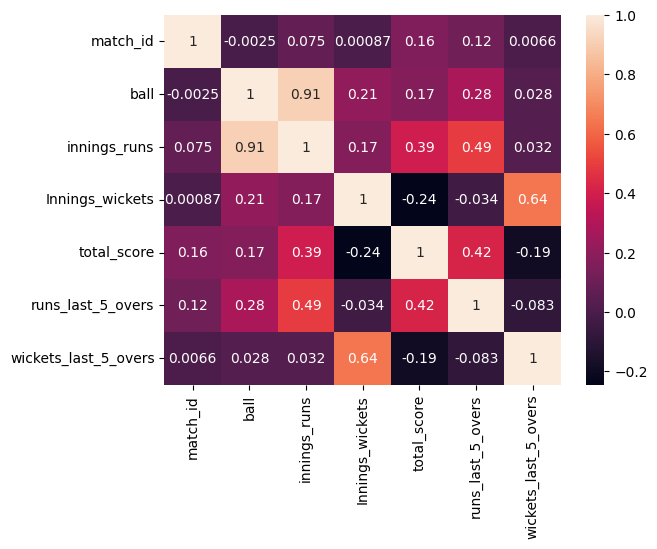

In [15]:
from seaborn import heatmap
numerical_world_df = world_df.select_dtypes(include=['int64', 'float64', 'int32'])
heatmap(data=numerical_world_df.corr(), annot=True)

In [16]:
world_df[world_df['venue'].isnull()]

,match_id,venue,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs


In [17]:
world_df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [18]:
world_df1.rename(columns={'id': 'match_id'}, inplace=True)

In [19]:
grouped = world_df1.groupby('match_id')['city'].sum().reset_index()

In [20]:
merged = world_df.merge(grouped, on='match_id', how='left')

In [21]:
merged.head()

,match_id,venue,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs,city
0,1389389,"Holkar Cricket Stadium, Indore",5.1,India,Australia,30,1,399,26.0,1.0,Indore
1,1389389,"Holkar Cricket Stadium, Indore",5.2,India,Australia,30,1,399,22.0,1.0,Indore
2,1389389,"Holkar Cricket Stadium, Indore",5.3,India,Australia,32,1,399,24.0,1.0,Indore
3,1389389,"Holkar Cricket Stadium, Indore",5.4,India,Australia,32,1,399,24.0,1.0,Indore
4,1389389,"Holkar Cricket Stadium, Indore",5.5,India,Australia,36,1,399,23.0,1.0,Indore


In [22]:
merged.drop(['match_id', 'venue'], axis=1, inplace=True)


In [23]:
merged.head()

,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs,city
0,5.1,India,Australia,30,1,399,26.0,1.0,Indore
1,5.2,India,Australia,30,1,399,22.0,1.0,Indore
2,5.3,India,Australia,32,1,399,24.0,1.0,Indore
3,5.4,India,Australia,32,1,399,24.0,1.0,Indore
4,5.5,India,Australia,36,1,399,23.0,1.0,Indore


In [24]:
merged.isnull().sum()

ball                    0
batting_team            0
bowling_team            0
innings_runs            0
Innings_wickets         0
total_score             0
runs_last_5_overs       0
wickets_last_5_overs    0
city                    0
dtype: int64

In [25]:
merged.shape

(927972, 9)

In [26]:
X = merged.drop(columns=['total_score'])
y = merged['total_score']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,ball,batting_team,bowling_team,innings_runs,Innings_wickets,runs_last_5_overs,wickets_last_5_overs,city
169457,16.4,West Indies,India,56,0,20.0,-1.0,Thiruvananthapuram
106323,17.6,Ireland,West Indies,59,0,19.0,0.0,St George's
728370,21.6,West Indies,England,103,0,26.0,0.0,Nottingham
566703,5.5,Zimbabwe,Bangladesh,30,0,24.0,0.0,Mirpur
681307,19.4,Bangladesh,India,102,0,23.0,0.0,Karachi
...,...,...,...,...,...,...,...,...
259178,16.1,South Africa,Sri Lanka,83,2,32.0,1.0,Port Elizabeth
365838,5.6,England,Sri Lanka,34,2,31.0,0.0,0
131932,36.4,Pakistan,Australia,212,8,36.0,1.0,Taunton
671155,16.3,Ireland,Zimbabwe,55,5,13.0,1.0,Nairobi


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [31]:
transformer = ColumnTransformer([
    ('transformer' , OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
], remainder='passthrough')

In [63]:
pipe = Pipeline(steps=[
    ('step1', transformer),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=15, random_state=42)),
])

In [64]:
# Ensure the columns to be encoded contain only strings
X_train['batting_team'] = X_train['batting_team'].astype(str)
X_train['bowling_team'] = X_train['bowling_team'].astype(str)
X_train['city'] = X_train['city'].astype(str)

X_test['batting_team'] = X_test['batting_team'].astype(str)
X_test['bowling_team'] = X_test['bowling_team'].astype(str)
X_test['city'] = X_test['city'].astype(str)

# Fit the pipeline and make predictions
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [65]:
r2_score(y_test, y_pred)


0.9633535742759705

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 5.96
MSE: 140.58
R² Score: 0.96


In [36]:
# For binary classification:
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

# Then calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.00


In [69]:
import pandas as pd

# Input data: match situation
input_data = {
    'batting_team': ['Sri Lanka'],
    'bowling_team': ['Bangladesh'],
    'innings_runs': [140],
    'Innings_wickets': [4],
    'ball': [27],  # e.g., 28 overs completed
    'runs_last_5_overs': [27],
    'wickets_last_5_overs': [1],
    'city': ['Chattogram']  # Add the city column as required by the pipeline
}

input_df = pd.DataFrame(input_data)

predicted_score = pipe.predict(input_df)[0] 

print(f"Predicted Final Score: {predicted_score:.0f}")


Predicted Final Score: 233


In [70]:
merged.describe()

,ball,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
count,927972.000000,927972.000000,927972.000000,927972.000000,927972.000000,927972.000000
mean,25.372601,123.711948,1.681441,241.409643,25.177263,0.334628
std,12.438972,69.863101,2.389409,61.844649,9.642273,0.701520
min,5.100000,2.000000,0.000000,12.000000,0.000000,-1.000000
25%,14.500000,67.000000,0.000000,202.000000,18.000000,0.000000
50%,24.600000,114.000000,0.000000,244.000000,24.000000,0.000000
75%,35.500000,171.000000,3.000000,283.000000,31.000000,0.000000
max,49.900000,481.000000,12.000000,481.000000,101.000000,7.000000
